In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam 
from matplotlib import pyplot as plt

In [2]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print("GPUs Available: ", len(physical_devices))

GPUs Available:  0


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train[:5])

img_rows=x_train[0].shape[0]
img_cols=x_test[0].shape[1]

X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

(60000, 28, 28)
(60000,)
[5 0 4 1 9]


In [4]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

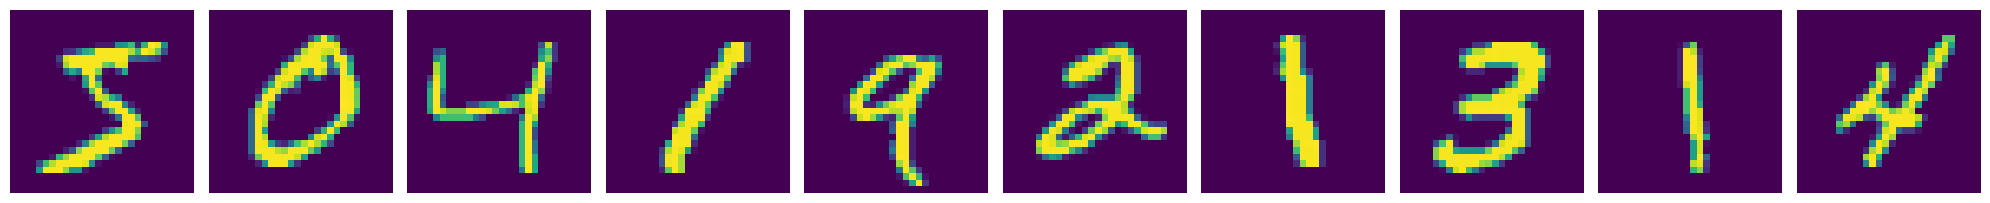

In [5]:
plotImages(x_train[:10])

In [6]:
#Creating a neural Network
model = Sequential([
      Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28, 1)),
      MaxPooling2D(pool_size=(2,2), padding='same'),
      Conv2D(32, (5,5), padding='same', activation='relu'),
      MaxPooling2D(pool_size=(2,2), padding='same'),
      Flatten(),
      Dense(1024, activation='relu'),
      Dropout(0.4),
      Dense(10)
])

c:\Users\tejas\OneDrive\Desktop\.vscode\myenvi\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,606,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,643,370 (6.27 MB)

 Trainable params: 1,643,370 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#compile neural network 
model.compile(optimizer=Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy']
              )

In [9]:
#training of neural network
batch_size = 200
epochs = 10
steps_per_epoch = 54000 // batch_size
validation_steps = 6000 // batch_size

In [10]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_split=0.1, 
                    validation_steps=validation_steps
                    )

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 3.2420 - sparse_categorical_accuracy: 0.7951 - val_loss: 0.0621 - val_sparse_categorical_accuracy: 0.9813
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 89us/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/10
  5/270 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0893 - sparse_categorical_accuracy: 0.9776

C:\Users\tejas\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


270/270 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0710 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.0469 - val_sparse_categorical_accuracy: 0.9867
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0460 - sparse_categorical_accuracy: 0.9849 - val_loss: 0.0421 - val_sparse_categorical_accuracy: 0.9863
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 35us/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0371 - sparse_categorical_accuracy: 0.9883 - val_loss: 0.0487 - val_sparse_categorical_accuracy: 0.9860
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00
Epoch 9/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0259 - sparse_categorical_accuracy: 0.9911 - val_loss: 0.0461 - val_sparse_categorical_accuracy: 0.9875
E

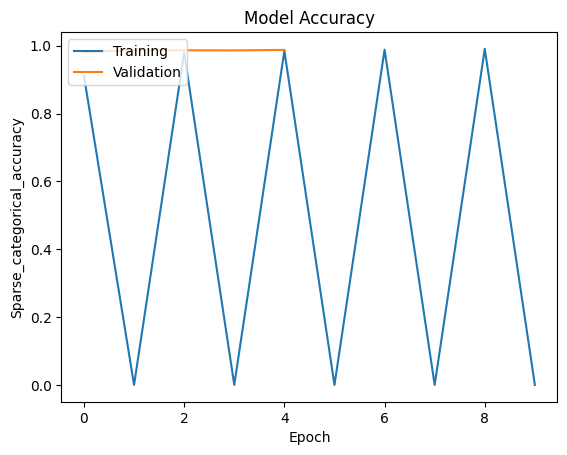

In [11]:
# Plot the accuracy of the model during training
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

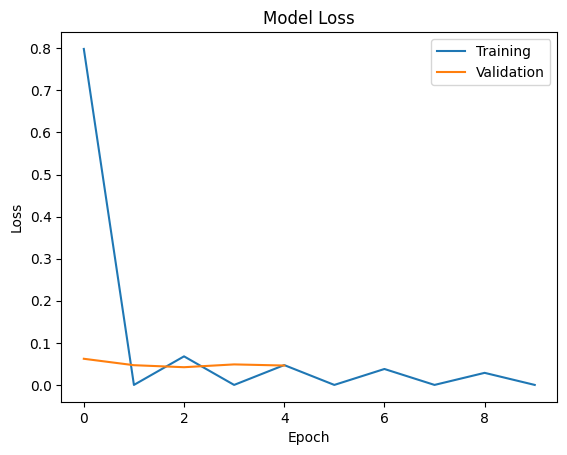

In [12]:
# Plot the loss of the model during training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [13]:
# Evaluate the best model with testing data.
print(model.evaluate(X_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0448 - sparse_categorical_accuracy: 0.9842
[0.03904178738594055, 0.9868999719619751]


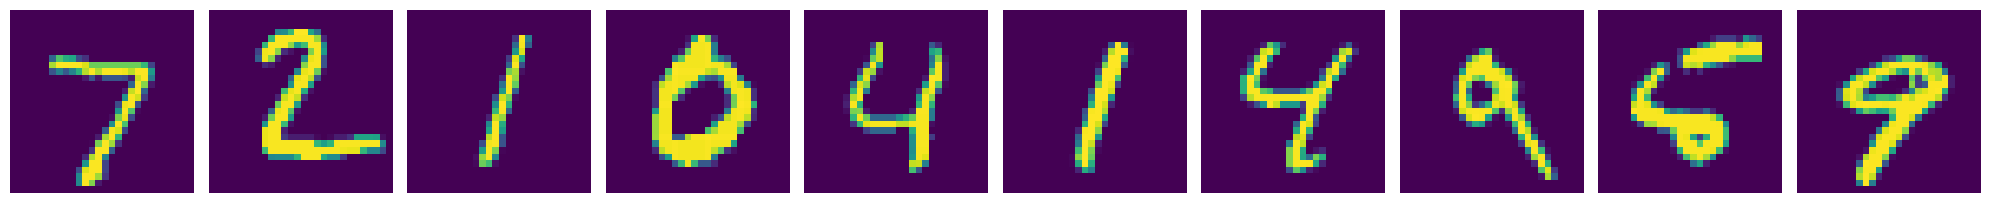

In [14]:
plotImages(x_test[:10])

In [15]:
predictions = np.argmax(model.predict(X_test[:10]), axis=-1)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[7 2 1 0 4 1 4 9 5 9]
